# Fitting Models Exercise 1

## Imports

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [40]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

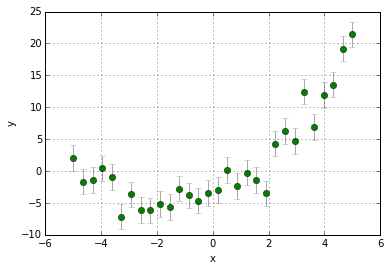

In [46]:
# YOUR CODE HERE
N = 30
xdata = np.linspace(-5, 5, N)

np.random.seed(0)
dy = 2.0
ydata = c_true + b_true * xdata + a_true * xdata**2 + np.random.normal(0.0, dy, size=N)

plt.errorbar(xdata, ydata, dy,fmt='og', ecolor='darkgray')
plt.xlabel('x')
plt.ylabel('y')
plt.grid();

In [25]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [27]:
# YOUR CODE HERE
def chi2(theta, x, y, dy):
    # theta = [c, b, a]
    return np.sum(((y - theta[0] - theta[1] * x - theta[2] * x**2) / dy) ** 2)

In [31]:
theta_guess = [0.0,1.0,2.0]
result = opt.minimize(chi2, theta_guess, args=(xdata,ydata,dy))
theta_best = result.x
print(theta_best)

[-3.84333683  1.84547627  0.58184171]


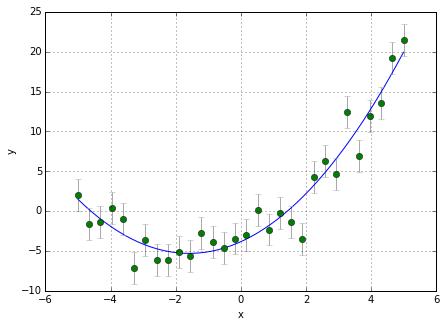

In [49]:
xfit = np.linspace(-5, 5)
yfit = theta_best[2]*xfit**2 + theta_best[1]*xfit + theta_best[0]
plt.figure(figsize=(7,5))
plt.plot(xfit, yfit)
plt.errorbar(xdata, ydata, dy, fmt='og', ecolor='darkgray')
plt.xlabel('x')
plt.ylabel('y')
plt.grid();

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors